## Step 1: Load packages, dataset and check the data we working with.

* Is there anything wrong with the data?
* Are there any anormalities with the data?
* Do I need to fix or remove any of the data including null values?



In [173]:
#importing necesaary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [159]:
df = pd.read_csv('/Users/mzwakhebesho/Documents/DPY401T Assignment/Regression Problem/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


The data is usable.

We can gather the following:
* The first row in the data file defines the column headers
* The headers are understandable enough to what each column represents.
* Each row represents an entry for an individual: 6 input data points and one target, which tells us the cost amount of the insurance.

In [126]:
# Now let's check complete information of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [127]:
# check the structure of the data
df.shape

# (1338, 7) : 1338 rows and 7 columns

(1338, 7)

Info cell shows data types of each column. We have categorical data in column: Sex, Smoker and Region.

Another question we need to ask ourselves is Region influencing insurance costs.

For now we going to check for null values

In [128]:
df.isnull().values.any()

False

Yay! We have no null values

In [160]:
# Categorical data, we can use OneHot Encoding. Prefer not to complicate it.
# Sex: Female - 0, Male - 1
# Smoker: Yes - 1, No - 0

try:
    gender = {'male': 1,'female': 0}
    is_smoker = {'yes': 1,'no': 0}
    df.sex = [gender[item] for item in df.sex]
    df.smoker = [is_smoker[item] for item in df.smoker]
except Exception as exc:
    print(f"[EXCEPTION] The dataframe has been transversed. Only run this cell once. - {exc}")

In [161]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


Now we have numeric values for sex and smoker columns. Since Region column has about 4 different regions, let's use enconding

### OneHot Encoding

In [162]:
# droping region as is a least feature I can use
df = df.drop(['region'], axis=1)
df.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [115]:
#OneHot encoding 
#df = pd.get_dummies(df,columns=['region'])
#df.head()

<AxesSubplot:>

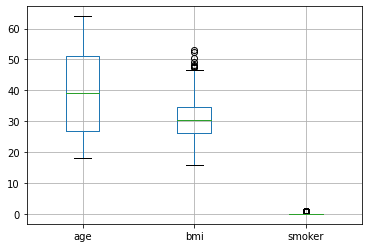

In [116]:
df.boxplot(column=['age','bmi','smoker'])

<AxesSubplot:>

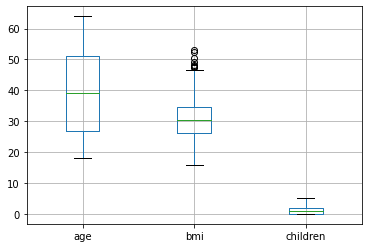

In [117]:
df.boxplot(column=['age','bmi','children'])

## Step 2: Scalling our data

From the boxplot above, we need to scale down our values

We could use the following:
* Standard Scaler
* MinMax Scaler
* Robust Scaler

We using MinMax Scaler because the largest data point or feature will have a value close to 1 or 1 and the minimum value will be 0.

In [101]:
from sklearn.preprocessing import MinMaxScaler

#data_scaler = MinMaxScaler()

#scaled_data = data_scaler.fit_transform(df.to_numpy())

In [102]:
#scaled_data = pd.DataFrame(scaled_data,columns=['age','sex','bmi','children','smoker','charges','region_northeast','region_northwest','region_southeast', 'region_southwest'])

In [103]:
#scaled_data.dtypes

<AxesSubplot:>

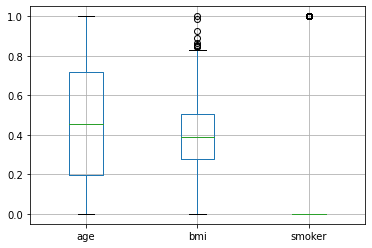

In [104]:
#scaled_data.boxplot(column=['age','bmi','smoker'])

<AxesSubplot:>

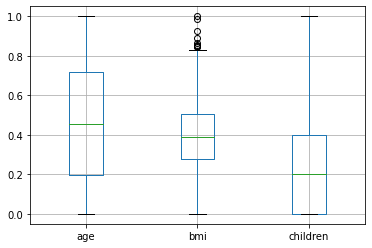

In [105]:
#scaled_data.boxplot(column=['age','bmi','children'])

## Step 3: Splitting Dataset into training and test

In [163]:
# First we need to take out features and targets in our dataset
feature_columns = ['age', 'sex', 'bmi', 'children', 'smoker']
X_features = df.drop(['charges'], axis=1) #axis = 1 means we taking the whole column and drop it. axis = 0 means whole row
Y_targets = df[['charges']]

In [164]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_features,Y_targets,test_size=0.33, random_state=42)

In [165]:
X_train.head()

,age,sex,bmi,children,smoker
1046,43,0,25.080,0,0
682,39,1,35.300,2,1
1037,45,0,30.495,1,1
490,19,0,32.900,0,0
39,60,1,39.900,0,1


## Applying Linear Regression as the first model

In [185]:
from sklearn.linear_model import LinearRegression

linear_r = LinearRegression()
linear_r.fit(X_train,y_train)

LinearRegression()

In [85]:
# Let's get the coef for each feature.

#linear_r.intercept_
#linear_r.coef_

#feature_columns #checking our column names
#feature_columns.insert(0,'Intercept')
#feature_columns #output after insertion

#coeficient = linear_r.coef_.tolist()
#coeficient
#coeficient.insert(0,linear_r.intercept_)

#equation_1 = zip(feature_columns, coeficient)

#for const1, const2 in equation_1:
#    print(f"{const1} - {const2} ")

Intercept - [1.87015889e+12] 
Intercept - [0.1955714086586708, -0.006293093177153115, 0.194750816121175, 0.034297352532725554, 0.3775608665750464, -1870158889122.3176, -1870158889122.329, -1870158889122.3367, -1870158889122.3347] 


Prediction time

In [186]:
y_train_pred = linear_r.predict(X_train)

In [187]:
# Model predictions using test data
y_test_pred = linear_r.predict(X_test)

In [188]:
test_results = X_test.copy()
test_results['true_charge'] = y_test
test_results['predicted_charge'] = y_test_pred

test_results.head(3)

,age,sex,bmi,children,smoker,true_charge,predicted_charge
764,45,0,25.175,2,0,9095.06825,8405.925660
887,36,0,30.020,0,0,5272.17580,6896.238685
890,64,0,26.885,0,1,29330.98315,36895.589824


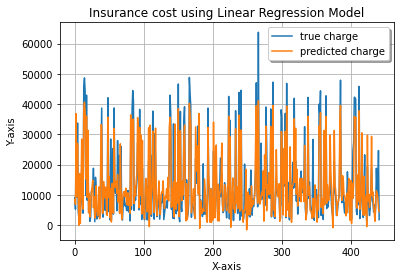

In [189]:
x_axis = range(len(y_test_pred))
plt.plot(x_axis, y_test, label="true charge")
plt.plot(x_axis, y_test_pred, label="predicted charge")
plt.title("Insurance cost using Linear Regression Model")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [170]:
model_score_train = linear_r.score(X_train,y_train)
model_score_test = linear_r.score(X_test,y_test)

print(f"Train score:{model_score_train} Test score:{model_score_test}")

Train score:0.7447818782365105 Test score:0.7587422388407032


In [171]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_test_pred)
r2

0.7587422388407032

## Applying Random Forest Regressor as the second model

In [190]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

random_forest_model = RandomForestRegressor(max_depth=100, n_estimators=100)

random_forest_model.fit(X_train, y_train)

/var/folders/25/mzv133cj43d_68dk_1mnk9480000gn/T/ipykernel_2436/2716070812.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=100)

In [191]:
RF_y_train_pred = random_forest_model.predict(X_train)

In [192]:
RF_y_test_pred = random_forest_model.predict(X_test)

In [193]:
RF_test_results = X_test.copy()
RF_test_results['true_charge'] = y_test
RF_test_results['predicted_charge'] = RF_y_test_pred

RF_test_results.head(3)

,age,sex,bmi,children,smoker,true_charge,predicted_charge
764,45,0,25.175,2,0,9095.06825,8951.925612
887,36,0,30.020,0,0,5272.17580,5657.001279
890,64,0,26.885,0,1,29330.98315,28331.522028


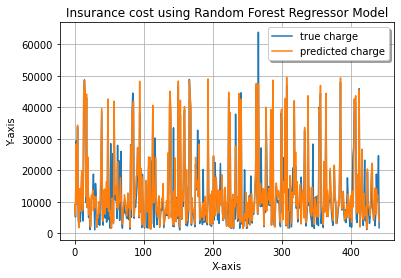

In [195]:
x_axis = range(len(y_test_pred))
plt.plot(x_axis, y_test, label="true charge")
plt.plot(x_axis, RF_y_test_pred, label="predicted charge")
plt.title("Insurance cost using Random Forest Regressor Model")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [196]:
rf_model_score_train = random_forest_model.score(X_train,y_train)
rf_model_score_test = random_forest_model.score(X_test,y_test)

print(f"Train score:{rf_model_score_train} Test score:{rf_model_score_test}")

Train score:0.9755003501851316 Test score:0.8378068145744116


## Applying Decision Tree Regressor as the third model

In [199]:
from sklearn.tree import DecisionTreeRegressor

DT_regressor = DecisionTreeRegressor()
DT_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [200]:
DT_y_train_pred = DT_regressor.predict(X_train)

In [201]:
DT_y_test_pred = DT_regressor.predict(X_test)

In [202]:
DT_test_results = X_test.copy()
DT_test_results['true_charge'] = y_test
DT_test_results['predicted_charge'] = DT_y_test_pred

DT_test_results.head(3)

,age,sex,bmi,children,smoker,true_charge,predicted_charge
764,45,0,25.175,2,0,9095.06825,8515.7587
887,36,0,30.020,0,0,5272.17580,5469.0066
890,64,0,26.885,0,1,29330.98315,28950.4692


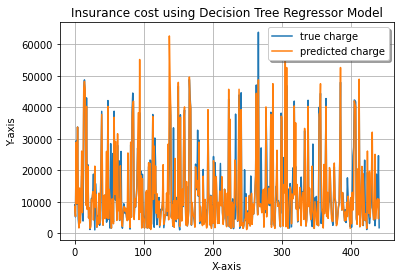

In [203]:
x_axis = range(len(y_test_pred))
plt.plot(x_axis, y_test, label="true charge")
plt.plot(x_axis, DT_y_test_pred, label="predicted charge")
plt.title("Insurance cost using Decision Tree Regressor Model")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [205]:
dt_model_score_train = DT_regressor.score(X_train,y_train)
dt_model_score_test = DT_regressor.score(X_test,y_test)

print(f"Train score:{dt_model_score_train} Test score:{dt_model_score_test}")

Train score:1.0 Test score:0.7069729406627393


Overfitting on Decision Tree Regressor. Good performance on the training data, poor generliazation to other data.

## Showing predicated values for different models on 1 table

In [206]:
final_results = X_test.copy()
final_results['true_charge'] = y_test
final_results['linear_regr_predicted_charge'] = y_test_pred
final_results['randomf_regr_predicted_charge'] = RF_y_test_pred
final_results['decisiont_regr_predicted_charge'] = DT_y_test_pred

final_results.head(3)

,age,sex,bmi,children,smoker,true_charge,linear_regr_predicted_charge,randomf_regr_predicted_charge,decisiont_regr_predicted_charge
764,45,0,25.175,2,0,9095.06825,8405.925660,8951.925612,8515.7587
887,36,0,30.020,0,0,5272.17580,6896.238685,5657.001279,5469.0066
890,64,0,26.885,0,1,29330.98315,36895.589824,28331.522028,28950.4692


## Determining the best model

In [210]:
models = [('Linear Regression', '{0:.3f}'.format(model_score_train), '{0:.3f}'.format(model_score_test)),
          ('Random Forest Regressor', '{0:.3f}'.format(rf_model_score_train), '{0:.3f}'.format(rf_model_score_test)),
          ('Decision Tree Regressor', '{0:.3f}'.format(dt_model_score_train), '{0:.3f}'.format(dt_model_score_test))]

model_results = pd.DataFrame(data = models, columns=['Model', 'Training R2_Score', 'Test R2_Score'])
model_results

,Model,Training R2_Score,Test R2_Score
0,Linear Regression,0.745,0.759
1,Random Forest Regressor,0.976,0.838
2,Decision Tree Regressor,1.000,0.707
